In [1]:
pwd


'C:\\Users\\Adam\\Documents\\Python Scripts'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gameSales=pd.read_csv("vgsales.csv")

In [4]:
gameSales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


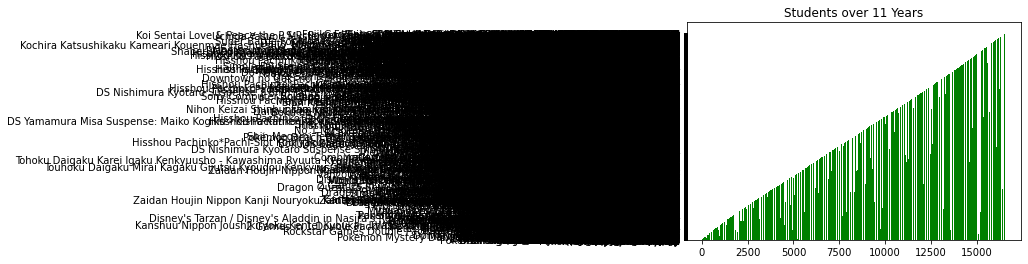

In [5]:


df = pd.DataFrame(gameSales)
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Students over 11 Years")

  
# Show the plot
plt.show()

In [101]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import 


SyntaxError: invalid syntax (3445837288.py, line 5)

In [105]:
ClothingData = pd.read_csv(r"C:\Users\Adam\Documents\Python Scripts\ClothesDataset\images.csv")


In [106]:
ClothingData = ClothingData.drop('sender_id', axis=1)
ClothingData = ClothingData.drop('kids', axis=1)

In [107]:
ClothingData

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,Shorts
5399,befa14be-8140-4faf-8061-1039947e329d,Body
5400,5379356a-40ee-4890-b416-2336a7d84061,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,Shoes


In [112]:
from pathlib import Path
from PIL import Image
import os

path="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\images_compressed\\" #changed to the host datapath 
path2="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\ClassifiedName\\"
# iterate over the unique label 
for item_name in ClothingData.label.unique(): 
    
    # create folder according to the label name 
    #item_folder = Path(f"{item_name}/")
    item_folder = Path(path2+f"{item_name}/")
    item_folder.mkdir(parents=True, exist_ok=True)
    
    # store id and gt for unique labels
    id = []
    gt = []
    
    # iterate over all possible number of unique labels 
    for id_label in ClothingData.loc[ClothingData['label'] == item_name].values.tolist():
        # id_label :['image_id', 'label']
        id.append(id_label[0]) # image_id
        gt.append(id_label[1]) # label
        
       # img = Image.open() # read the image 
#img = Image.open(id_label[0]) # read the image 
           
        try:
            #get image and save as grayscale
            img=Image.open(os.path.join(path,id_label[0])+".jpg").convert('L')
            
         
        except:
            print("unreadable file: "+id_label[0])
                  
                
        
       # Resize Image
        basewidth = 300
        wpercent = (basewidth / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((basewidth, hsize), Image.ANTIALIAS)
            
            
        img.save(f'{item_folder}/{id_label[0]}'+".jpg") # and save to target folder 
    
    # save the individual ground truth 
    # to the concern directory 
    label = pd.DataFrame({ 
            'Image Index': id,
            'labels': gt
        })
#label.to_csv(f'{path2}/{item_folder}.csv', index=False)

    label.to_csv(f'{item_folder}.csv', index=False)

unreadable file: d028580f-9a98-4fb5-a6c9-5dc362ad3f09
unreadable file: 1d0129a1-f29a-4a3f-b103-f651176183eb
unreadable file: 784d67d4-b95e-4abb-baf7-8024f18dc3c8
unreadable file: c60e486d-10ed-4f64-abab-5bb698c736dd
unreadable file: 040d73b7-21b5-4cf2-84fc-e1a80231b202


In [93]:
#print(label)

                              Image Index  labels
0    396cdf47-f336-491c-919c-ae80cf1d02ba      57
1    5008492c-339e-454c-b741-a676d22f1f5c     324
2    0d9f1bf9-0008-4247-b22b-832ab1c62a70     150
3    67242183-82be-491d-84cb-cd0ae9d00e19     142
4    1fd19366-a938-4eb3-83c9-4bc474f495be     150
..                                    ...     ...
104  ad19b17f-66d9-4f5b-8a90-9539f0311806     310
105  cb24db34-d06c-4671-89a7-7f5e5eee7cdc     204
106  64937043-1a83-4440-a5b3-c05f35bbe4fe     309
107  4cd9a0b0-4953-47fb-b8d0-4eb9b3616b29     204
108  7fe3f9b7-ccee-4d88-a165-389762f3d77a      46

[109 rows x 2 columns]


Skirt Image Before Prelimenary Pre-Processing


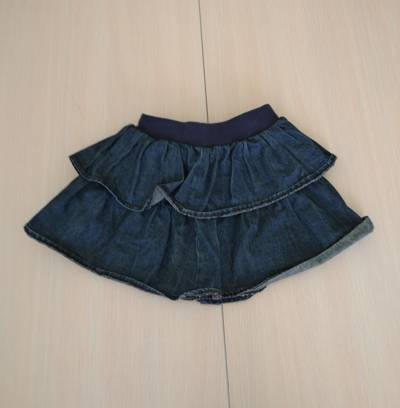

In [125]:
from IPython.display import Image


print("Skirt Image Before Prelimenary Pre-Processing")
Image(filename=path+'32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Skirt Image After Prelimenary Pre-Processing


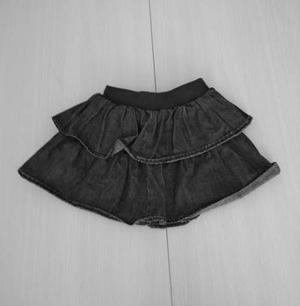

In [124]:
print("Skirt Image After Prelimenary Pre-Processing")
Image(filename=path2+'Skirt\\32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Polo Image Before Prelimenary Pre-Processing


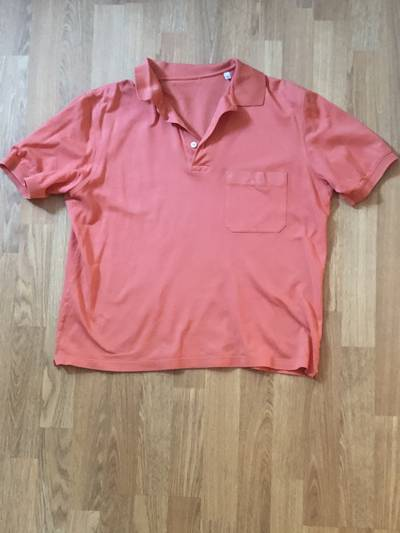

In [126]:
print("Polo Image Before Prelimenary Pre-Processing")
Image(filename=path+'0cab4de0-5818-4680-a00a-35dbc6e95525.jpg') 

Polo Image After Prelimenary Pre-Processing


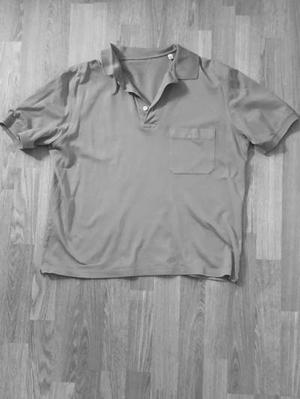

In [128]:
print("Polo Image After Prelimenary Pre-Processing")
Image(filename=path2+'Polo//0cab4de0-5818-4680-a00a-35dbc6e95525.jpg') 

Polo Image Before Prelimenary Pre-Processing


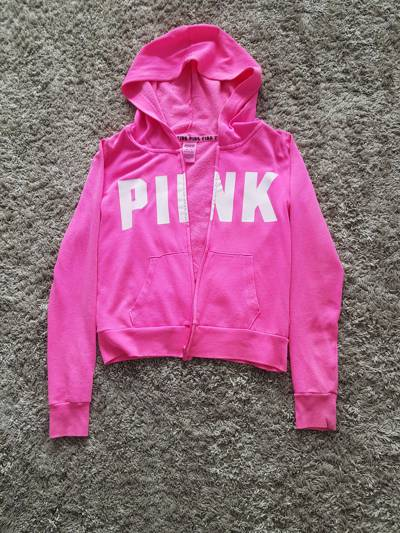

In [130]:
print("Polo Image Before Prelimenary Pre-Processing")
Image(filename=path+'000d31f6-44b5-4758-8d86-c4fcfb234392.jpg') 

Polo Image After Prelimenary Pre-Processing


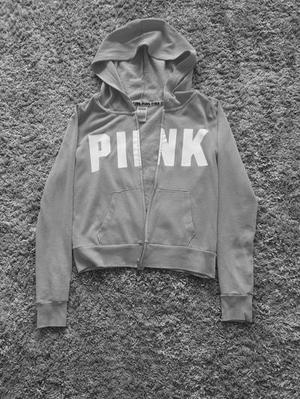

In [129]:
print("Polo Image After Prelimenary Pre-Processing")
Image(filename=path2+'hoodie//000d31f6-44b5-4758-8d86-c4fcfb234392.jpg') 